In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import datetime

speedrunurl = 'https://www.speedrun.com/api/v1'
all_grand_prix_id = 'wkp4olgk'
mario_kart_world_id = 'pd0nk7w1'

/Users/a266490/Documents/data_analysis/mario_kart_world/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### First I will grab the current leaderboard for Mario Kart World for speed runs of Grand-Prix Mode

In [2]:
mkworld_leaderboard_url = 'https://www.speedrun.com/api/v1/leaderboards/' + mario_kart_world_id +  '/category/' + all_grand_prix_id

leaderboard = requests.get(mkworld_leaderboard_url)
leaderboard = leaderboard.json()

print(leaderboard)

{'data': {'weblink': 'https://www.speedrun.com/MKWorld#all-grand-prix', 'game': 'pd0nk7w1', 'category': 'wkp4olgk', 'level': None, 'platform': None, 'region': None, 'emulators': None, 'video-only': False, 'timing': 'realtime', 'values': {}, 'runs': [{'place': 1, 'run': {'id': 'y28jnq9y', 'weblink': 'https://www.speedrun.com/MKWorld/run/y28jnq9y', 'game': 'pd0nk7w1', 'level': None, 'category': 'wkp4olgk', 'videos': {'links': [{'uri': 'https://youtu.be/WTxGywP0zOE'}]}, 'comment': "LET'S GO 1:33:XX !!!!", 'status': {'status': 'verified', 'examiner': 'x3w2lzej', 'verify-date': '2025-07-10T04:45:03Z'}, 'players': [{'rel': 'user', 'id': 'xyr6r5wj', 'uri': 'https://www.speedrun.com/api/v1/users/xyr6r5wj'}], 'date': '2025-07-09', 'submitted': '2025-07-09T22:36:57Z', 'times': {'primary': 'PT1H34M12S', 'primary_t': 5652, 'realtime': 'PT1H34M12S', 'realtime_t': 5652, 'realtime_noloads': None, 'realtime_noloads_t': 0, 'ingame': None, 'ingame_t': 0}, 'system': {'platform': '3167lw9q', 'emulated': F

### Then I will create a Data frame of this data

In [3]:
# print(leaderboard['data']['runs'])

places = []
users = []
times = []
dates = []
platforms = []
status_list = []
emulated_list = []

runs = leaderboard['data']['runs']

for run in runs:
    specific_run = run['run']
    user = specific_run['players'][0]['id'] if 'id' in specific_run['players'][0] else (specific_run['players'][0]['name'] if 'name' in specific_run['players'][0] else '')
    time = specific_run['times']['primary_t']
    date = specific_run['submitted']
    platform = specific_run['system']['platform']
    emulated = specific_run['system']['emulated']
    status = specific_run['status']['status']


    places.append(run['place'])
    users.append(user)
    times.append(time)
    platforms.append(platform)
    dates.append(date)
    status_list.append(status)
    emulated_list.append(emulated)

mk_world_df = pd.DataFrame({
    'place': places,
    'player': users,
    'speed_run_time': times,
    'console': platforms,
    'emulated': emulated_list,
    'status': status_list,
    'date_achieved': dates
})

mk_world_df.to_csv('./csv/mkworld.csv', index=False)

print(mk_world_df['speed_run_time'].max())
print(mk_world_df[mk_world_df['player'] == 'ylj765km'])
mk_world_df.head(20)


6369
Empty DataFrame
Columns: [place, player, speed_run_time, console, emulated, status, date_achieved]
Index: []


,place,player,speed_run_time,console,emulated,status,date_achieved
0,1,xyr6r5wj,5652,3167lw9q,False,verified,2025-07-09T22:36:57Z
1,2,e8eky2p8,5697,3167lw9q,False,verified,2025-07-05T12:38:05Z
2,3,qj2o2m7x,5698,3167lw9q,False,verified,2025-07-10T01:38:07Z
3,4,x31wnl68,5700,3167lw9q,False,verified,2025-07-03T23:14:05Z
4,5,x7z19eq8,5714,3167lw9q,False,verified,2025-06-28T09:23:01Z
5,6,jo3v643j,5719,3167lw9q,False,verified,2025-06-30T19:22:42Z
6,6,jm069ez8,5719,3167lw9q,False,verified,2025-07-06T18:59:37Z
7,8,x316nv68,5724,3167lw9q,False,verified,2025-06-27T12:02:41Z
8,9,8d3pgv9x,5729,3167lw9q,False,verified,2025-07-07T22:46:02Z
9,10,joo666nj,5772,3167lw9q,False,verified,2025-07-09T23:03:12Z


### I want to plot a time series of this data now, will convert the data column to an actual date type for my usage

In [4]:
mk_world_df['date_achieved'] = pd.to_datetime(mk_world_df['date_achieved'])

In [5]:
mk_world_df = mk_world_df.sort_values('date_achieved', ascending=True, inplace=False)

mk_world_df.head()

,place,player,speed_run_time,console,emulated,status,date_achieved
63,64,18q35djn,6027,3167lw9q,False,verified,2025-06-26 19:02:54+00:00
57,58,kjpwk44x,5999,3167lw9q,False,verified,2025-06-26 19:05:28+00:00
54,54,qj299opx,5980,3167lw9q,False,verified,2025-06-26 19:06:08+00:00
33,34,x33g12kx,5886,3167lw9q,False,verified,2025-06-26 19:13:55+00:00
34,35,x7m9nwvx,5892,3167lw9q,False,verified,2025-06-26 19:14:09+00:00


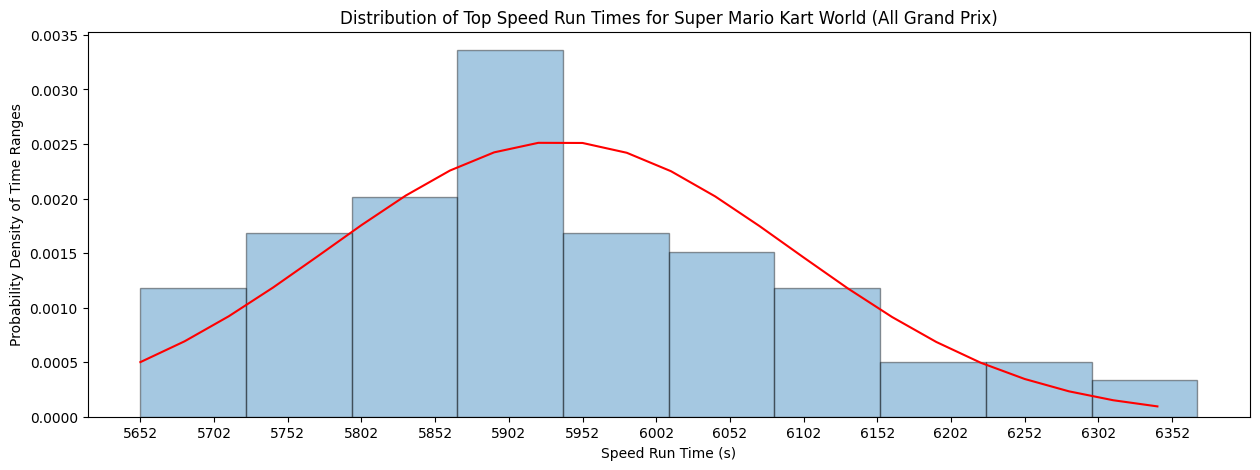

In [6]:
mean_times = mk_world_df['speed_run_time'].mean()
std_times = mk_world_df['speed_run_time'].std()
x_points = np.arange(mk_world_df['speed_run_time'].min(), mk_world_df['speed_run_time'].max(), 30)
xticks = np.arange(mk_world_df['speed_run_time'].min(), mk_world_df['speed_run_time'].max(), 50)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(mk_world_df['speed_run_time'], bins=10, density=True, alpha=0.4, edgecolor='black')
ax.set_xticks(xticks)
ax.set_xlabel('Speed Run Time (s)')
ax.set_ylabel('Probability Density of Time Ranges')
ax.set_title('Distribution of Top Speed Run Times for Super Mario Kart World (All Grand Prix)')
ax.plot(x_points, norm.pdf(x_points, mean_times, std_times), 'r-')


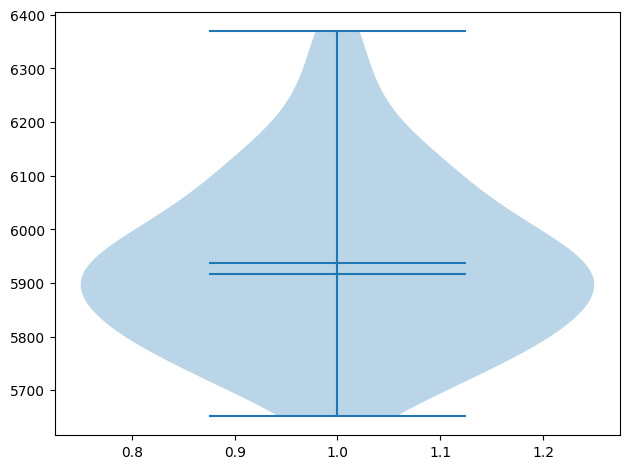

In [7]:
plt.violinplot(mk_world_df['speed_run_time'], showmeans=True, showmedians=True)
plt.tight_layout()
plt.show()